In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read the test set

In [2]:
df_test = pd.read_csv('../data/X_test.csv')[:100000]
df_test.head()

,npval_50971,nptime_50971,npval_50983,nptime_50983,npval_50902,nptime_50902,npval_51221,nptime_51221,npval_50912,nptime_50912,...,nptime_last_51104,npval_last_51078,nptime_last_51078,npval_last_50884,nptime_last_50884,npval_last_51255,nptime_last_51255,first_race,chartyear,hadm_id
0,4.3,18.0,137.0,18.0,102.0,18.0,38.4,18.0,1.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,2190,20000057
1,3.3,16.0,141.0,16.0,103.0,16.0,38.2,16.0,1.1,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,2190,20000057
2,3.4,17.0,145.0,17.0,103.0,17.0,39.0,17.0,1.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,2190,20000057
3,4.0,12.0,138.0,12.0,103.0,12.0,37.8,12.0,0.8,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,2193,20000293
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black,2183,20000298


In [3]:
lab_columns = [col for col in df_test.columns if 'npval_' in col and 'last_' not in col]
# Check the most popular labs (values with non-missing values)
most_popular_labs = {lab_id.replace('npval_', ''): df_test[lab_id].notna().sum() for lab_id in lab_columns}
# Sort the labs by the number of non-missing values
most_popular_labs = dict(sorted(most_popular_labs.items(), key=lambda item: item[1], reverse=True))

In [4]:
most_popular_labs

{'50912': 90094,
 '51221': 90090,
 '50971': 90080,
 '50983': 89609,
 '51006': 89591,
 '50902': 89533,
 '50882': 88765,
 '50868': 88688,
 '51265': 88568,
 '51222': 88407,
 '51301': 88333,
 '51249': 88283,
 '51279': 88278,
 '51250': 88278,
 '51248': 88275,
 '51277': 88207,
 '50931': 87980,
 '50960': 80787,
 '50893': 77103,
 '50970': 77055,
 '51274': 44232,
 '51237': 44231,
 '52172': 41598,
 '51275': 40638,
 '51678': 34060,
 '50934': 31109,
 '50878': 27755,
 '50861': 27591,
 '50885': 27058,
 '50863': 26990,
 '50947': 24558,
 '51244': 16931,
 '51256': 16741,
 '51254': 16404,
 '50862': 14337,
 '50954': 14137,
 '51200': 12998,
 '51146': 12085,
 '51491': 10556,
 '51498': 10371,
 '50820': 10247,
 '50813': 9743,
 '50821': 8964,
 '50804': 8960,
 '50818': 8959,
 '52075': 7674,
 '51133': 7665,
 '52074': 7515,
 '50910': 7009,
 '50911': 6173,
 '50808': 5938,
 '52073': 5701,
 '52069': 5605,
 '51516': 5571,
 '52135': 5417,
 '51493': 5329,
 '51009': 4929,
 '50802': 4487,
 '51003': 4443,
 '51492': 4098,

## Compare the results of our MAE model vs and XGBoost

In order to compare the results of our MAE model vs an XGBoost model, we will use a set of 100k patients from the test set. We'll use XGBoost as baseline given their performance in tabular data prediction. 

We trained an XGBoost model using hyperparameters tuning per lab value and the results of the best XGboost model per lab value was compared with our foundation MAE transformer model.

The metrics calculated are the following:

* MAE
* RMSE
* R2

You can replicate our results using the following command:

```bash
python run_test_mae_race.py
```

In [5]:
results_df = pd.read_csv('results/results_test_mae_xgb.csv')
results_df.Column = results_df.Column.str.replace('npval_', '')
results_df

,Column,RMSE,MAE,R2,Err,Model
0,50971,0.327172,0.258758,0.494088,0,XGB
1,50983,1.035059,0.672486,0.921317,0,XGB
2,50902,1.048571,0.684399,0.952161,0,XGB
3,51221,0.578591,0.220715,0.988744,0,XGB
4,50912,0.260503,0.143620,0.928693,0,XGB
...,...,...,...,...,...,...
195,51143,1.370295,0.951636,0.497930,0,MAE
196,51104,97.262782,68.306247,0.845336,0,MAE
197,51078,16.969295,11.570767,0.815604,0,MAE
198,50884,0.506539,0.313891,0.896150,0,MAE


In [6]:
# Pivoting the DataFrame to organize by model and column for easier comparison
df_pivot = results_df.pivot_table(index='Column', columns='Model', values=['RMSE', 'MAE', 'R2'], aggfunc='first')
df_pivot.columns = [f'{metric}_{model}' for metric, model in df_pivot.columns]

# Sort the dataset by the most popular labs
df_pivot['Popularity'] = df_pivot.index.map(most_popular_labs)
df_pivot.sort_values('Popularity', ascending=False, inplace=True)

# Display the organized dataset
df_pivot

,MAE_MAE,MAE_XGB,R2_MAE,R2_XGB,RMSE_MAE,RMSE_XGB,Popularity
Column,,,,,,,
50912,0.131968,0.143620,0.943167,0.928693,0.232567,0.260503,90094
51221,0.197031,0.220715,0.989314,0.988744,0.563751,0.578591,90090
50971,0.208854,0.258758,0.654313,0.494088,0.270446,0.327172,90080
50983,0.492014,0.672486,0.942723,0.921317,0.883104,1.035059,89609
51006,3.010252,3.270549,0.925489,0.912527,4.531328,4.909659,89591
...,...,...,...,...,...,...,...
51143,0.951636,1.211769,0.497930,0.281131,1.370295,1.639672,1349
50884,0.313891,0.318916,0.896150,0.890763,0.506539,0.519510,1345
51255,0.884014,1.113288,0.585394,0.408658,1.296005,1.547776,1254


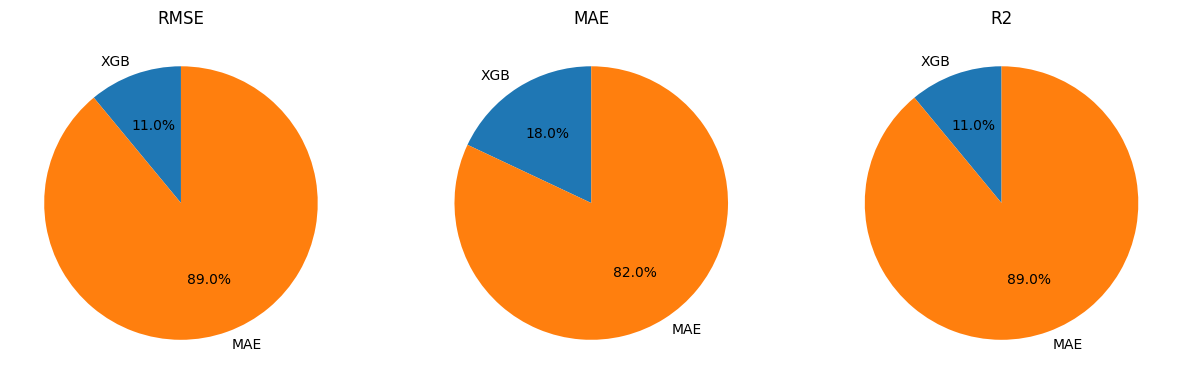

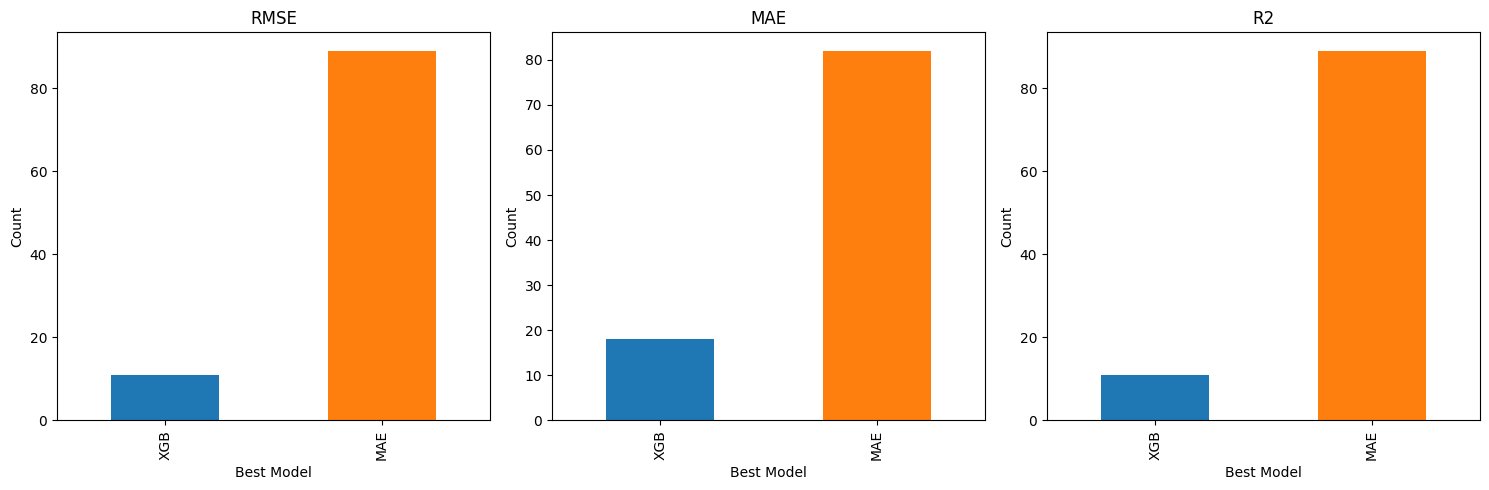

,RMSE,MAE,R2
MAE,89,82,89
XGB,11,18,11


In [7]:
# Function to determine which model performs better per lab per metric
def best_model(row):
    best_per_lab = {}
    for metric in ['RMSE', 'MAE', 'R2']:
        xgb_col = f'{metric}_XGB'
        mae_col = f'{metric}_MAE'
        if metric == 'R2':
            best_per_lab[metric] = 'XGB' if row[xgb_col] > row[mae_col] else 'MAE'  # Higher R2 is better
        else:
            best_per_lab[metric] = 'XGB' if row[xgb_col] < row[mae_col] else 'MAE'  # Lower RMSE/MAE is better
    return best_per_lab

# Create a dictionary with the best model per lab per metric
best_model_dict = df_pivot.apply(best_model, axis=1).to_dict()

# Retrieve the default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot a pie chart to show the distribution of the best models per metric
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, metric in enumerate(['RMSE', 'MAE', 'R2']):
    best_model_series = pd.Series({k: v[metric] for k, v in best_model_dict.items()})
    
    # Ensure MAE is the second element so it gets the second color (orange by default)
    ordered_series = best_model_series.value_counts().reindex(['XGB', 'MAE'])
    
    ordered_series.plot.pie(ax=axs[i], autopct='%1.1f%%', startangle=90, colors=default_colors[:len(ordered_series)], title=metric)
    axs[i].set_ylabel('')

# Plot a bar chart to show the distribution of the best models per metric
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, metric in enumerate(['RMSE', 'MAE', 'R2']):
    best_model_series = pd.Series({k: v[metric] for k, v in best_model_dict.items()})
    
    # Ensure MAE is the second element so it gets the default orange color
    ordered_series = best_model_series.value_counts().reindex(['XGB', 'MAE'])
    
    ordered_series.plot.bar(ax=axs[i], color=default_colors[:len(ordered_series)], title=metric)
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('Best Model')

plt.tight_layout()
plt.show()

# Plot the bar chart for distribution of the best models per metric as a table for easier comparison
best_model_df = {}
for metric in ['RMSE', 'MAE', 'R2']:
    best_model_series = pd.Series({k: v[metric] for k, v in best_model_dict.items()})
    best_model_df[metric] = best_model_series.value_counts()
    
best_model_df = pd.DataFrame(best_model_df)
best_model_df

### Plot the comparison of the results per lab value

<Figure size 1200x600 with 0 Axes>

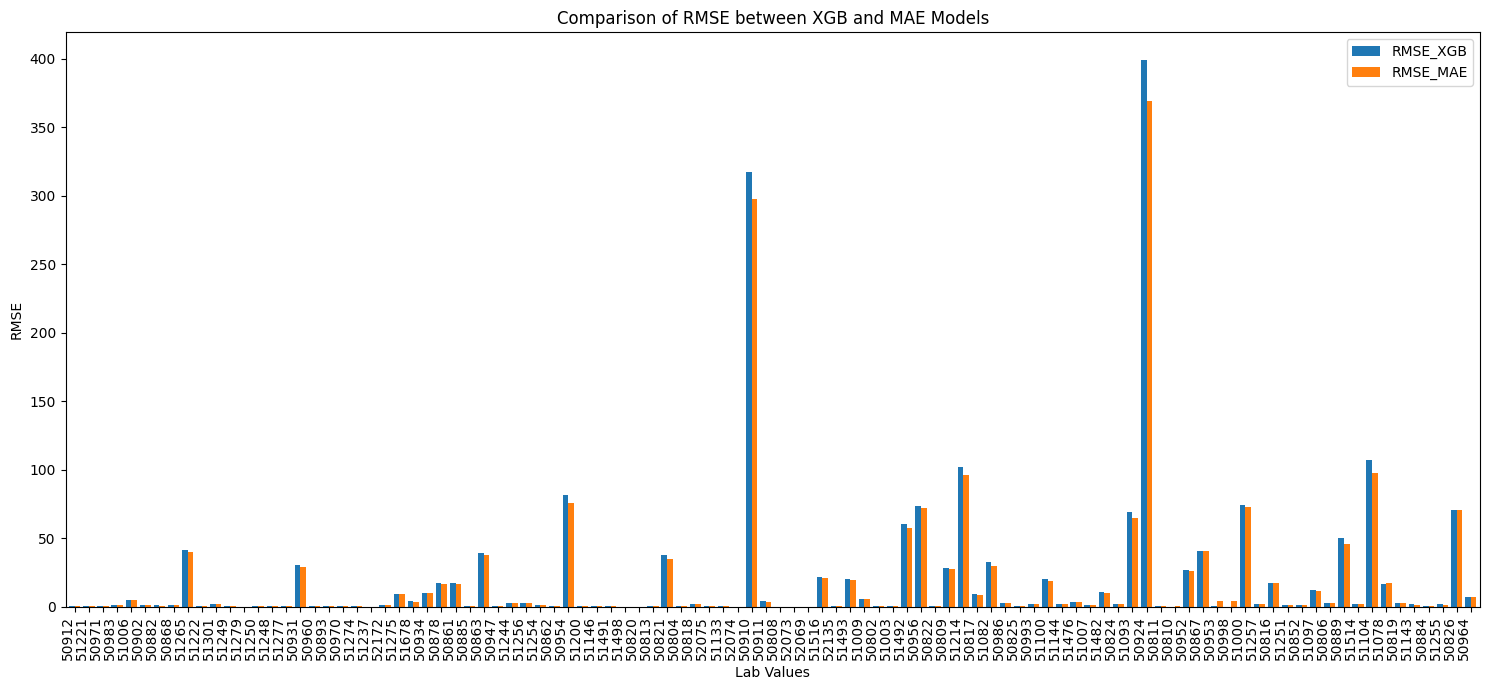

<Figure size 1200x600 with 0 Axes>

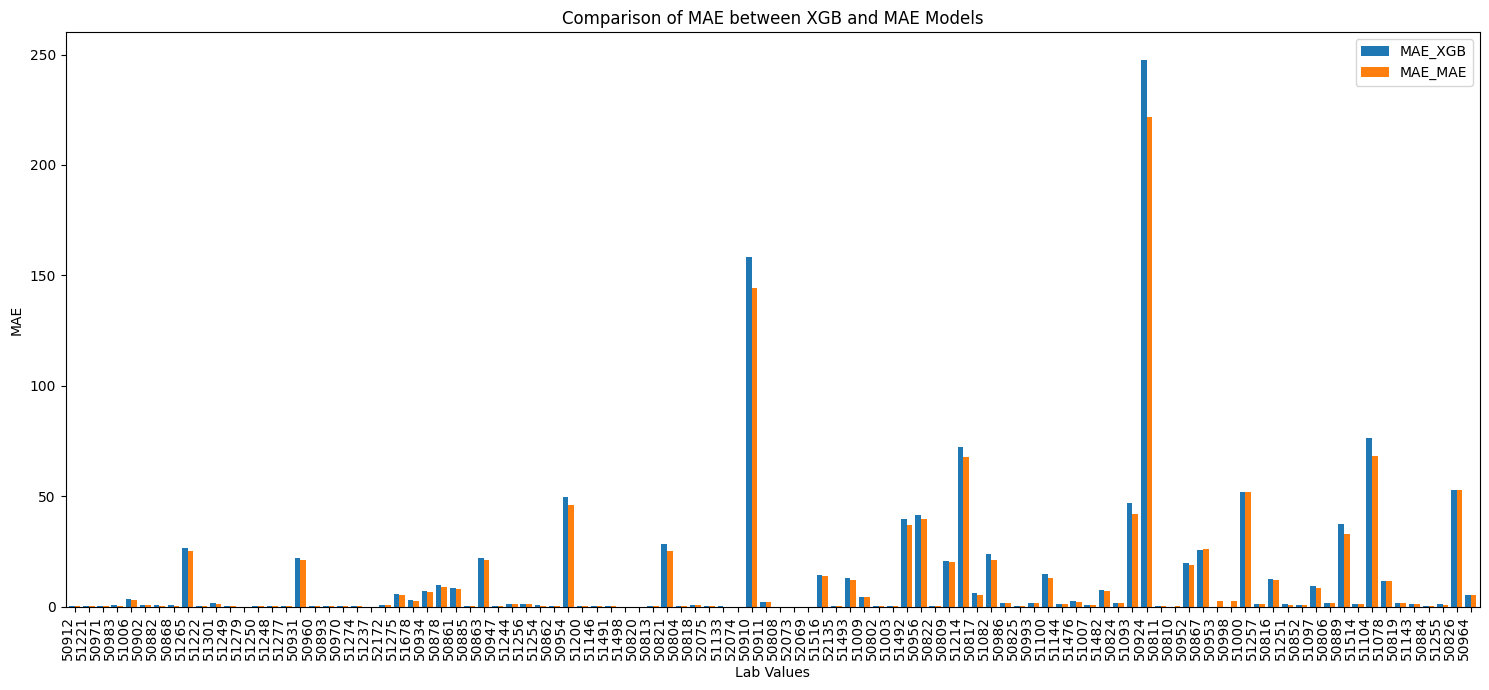

<Figure size 1200x600 with 0 Axes>

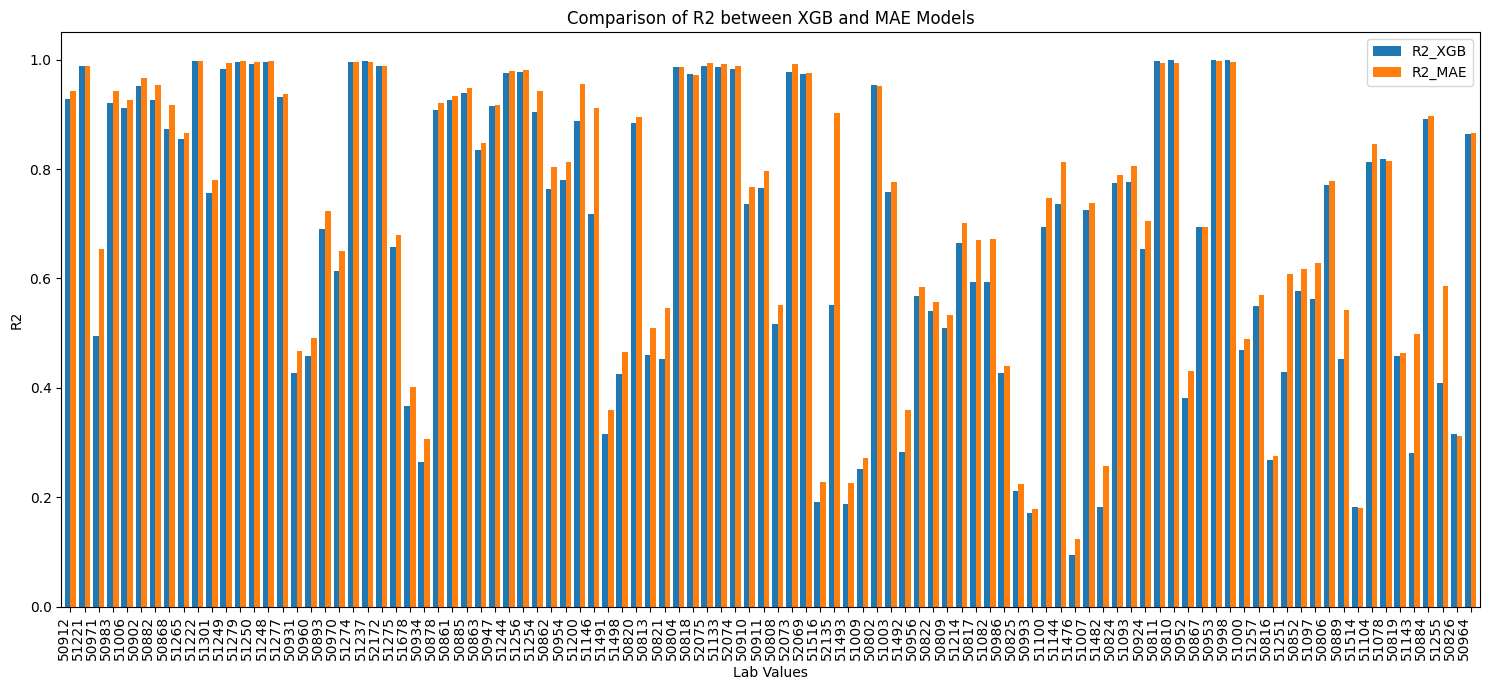

In [8]:
# Plot comparison for all labs
metrics = ['RMSE', 'MAE', 'R2']
df_pivot.reset_index(inplace=True)

for metric in metrics:
    plt.figure(figsize=(12, 6))
    df_pivot.plot(x='Column', y=[f'{metric}_XGB', f'{metric}_MAE'], kind='bar', width=0.8, figsize=(15, 7))
    plt.title(f'Comparison of {metric} between XGB and MAE Models')
    plt.ylabel(metric)
    plt.xlabel("Lab Values")
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

#### Comparison of the results for the top 20 lab values

<Figure size 1200x600 with 0 Axes>

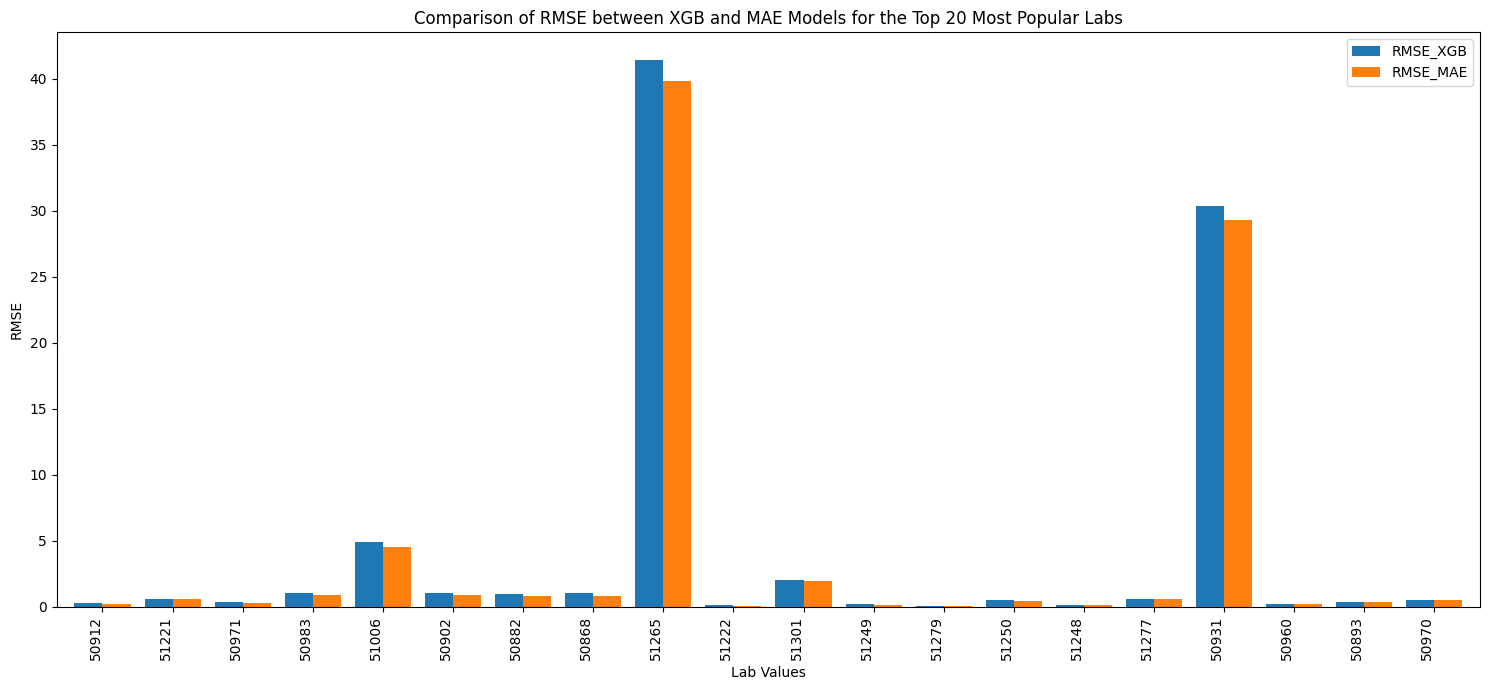

   Column   RMSE_XGB   RMSE_MAE
0   50912   0.260503   0.232567
1   51221   0.578591   0.563751
2   50971   0.327172   0.270446
3   50983   1.035059   0.883104
4   51006   4.909659   4.531328
5   50902   1.048571   0.876029
6   50882   0.959481   0.768633
7   50868   1.007826   0.808470
8   51265  41.464468  39.861015
9   51222   0.092978   0.079542
10  51301   2.034082   1.934959
11  51249   0.194270   0.113760
12  51279   0.044065   0.035345
13  51250   0.518426   0.400747
14  51248   0.158519   0.108629
15  51277   0.578758   0.549347
16  50931  30.392161  29.276609
17  50960   0.183774   0.177932
18  50893   0.342332   0.324256
19  50970   0.535880   0.510569


<Figure size 1200x600 with 0 Axes>

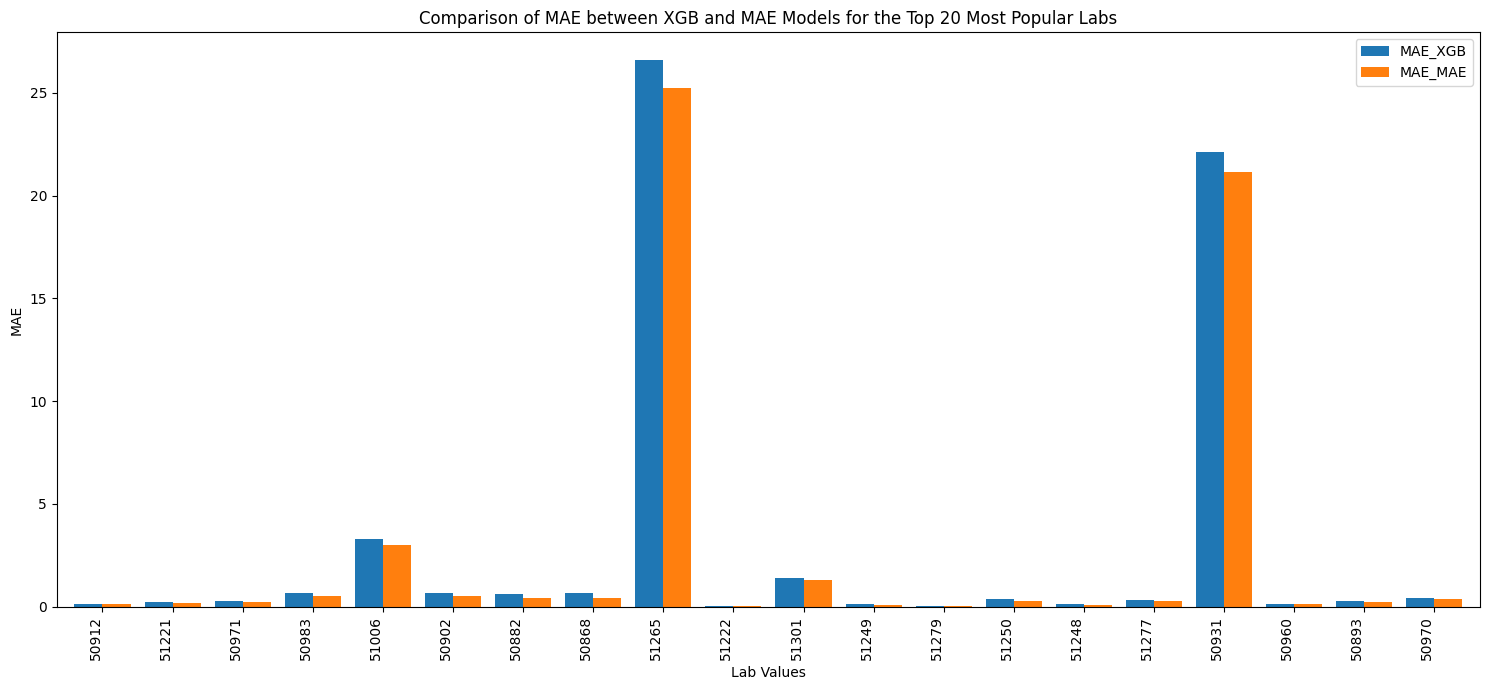

   Column    MAE_XGB    MAE_MAE
0   50912   0.143620   0.131968
1   51221   0.220715   0.197031
2   50971   0.258758   0.208854
3   50983   0.672486   0.492014
4   51006   3.270549   3.010252
5   50902   0.684399   0.497968
6   50882   0.634142   0.411688
7   50868   0.682281   0.436680
8   51265  26.616683  25.215863
9   51222   0.049297   0.044419
10  51301   1.402734   1.304642
11  51249   0.134021   0.067657
12  51279   0.022894   0.016445
13  51250   0.352366   0.290318
14  51248   0.108663   0.072081
15  51277   0.320713   0.296335
16  50931  22.124961  21.130978
17  50960   0.141322   0.135799
18  50893   0.259224   0.243953
19  50970   0.413080   0.391269


<Figure size 1200x600 with 0 Axes>

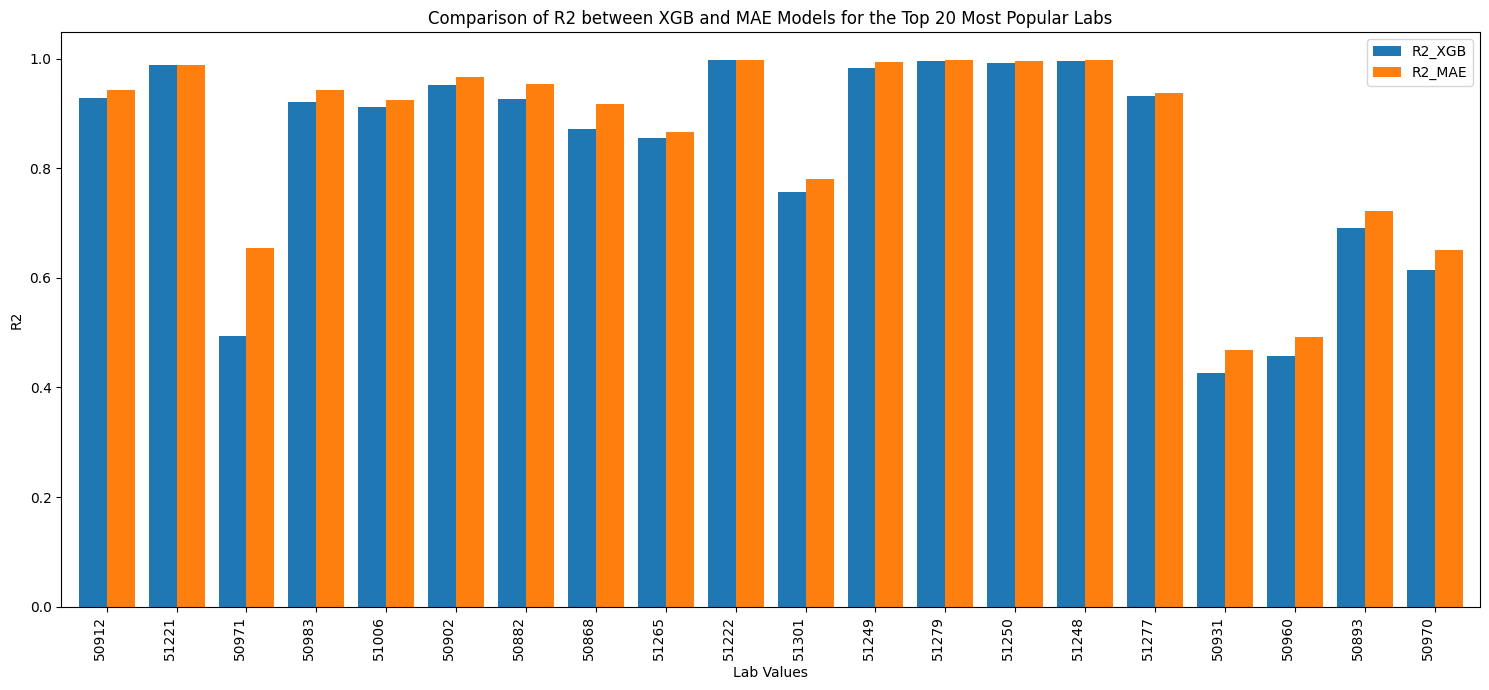

   Column    R2_XGB    R2_MAE
0   50912  0.928693  0.943167
1   51221  0.988744  0.989314
2   50971  0.494088  0.654313
3   50983  0.921317  0.942723
4   51006  0.912527  0.925489
5   50902  0.952161  0.966610
6   50882  0.926923  0.953103
7   50868  0.872367  0.917867
8   51265  0.854836  0.865846
9   51222  0.997642  0.998274
10  51301  0.757072  0.780171
11  51249  0.982448  0.993981
12  51279  0.995552  0.997138
13  51250  0.992985  0.995808
14  51248  0.995422  0.997850
15  51277  0.931321  0.938124
16  50931  0.426362  0.467700
17  50960  0.457297  0.491256
18  50893  0.691016  0.722785
19  50970  0.614521  0.650076


In [9]:
# Plot comparison for the top 20 most popular labs
metrics = ['RMSE', 'MAE', 'R2']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    df_pivot[:20].plot(x='Column', y=[f'{metric}_XGB', f'{metric}_MAE'], kind='bar', width=0.8, figsize=(15, 7))
    plt.title(f'Comparison of {metric} between XGB and MAE Models for the Top 20 Most Popular Labs')
    plt.ylabel(metric)
    plt.xlabel("Lab Values")
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Show a table with the comparison
    print(df_pivot[:20][['Column', f'{metric}_XGB', f'{metric}_MAE']])

In [10]:
# Calculate mean values for each model
mean_performance = results_df.groupby('Model').mean()
mean_performance

/var/folders/4w/k6c16td51cv9ytcmnnvx3mpw0000gn/T/ipykernel_53499/3083297774.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_performance = results_df.groupby('Model').mean()


,RMSE,MAE,R2,Err
Model,,,,
MAE,18.410756,11.503231,0.726398,0.0
XGB,19.445984,12.365286,0.691986,0.0


## Compare the results of our MAE model vs and XGBoost per Race (fairness analysis)

In order to assess the fairness of our model, and understand if the risks and limitations of our model, we will compare the results of our MAE model vs an XGBoost grouped by 5 different groups of patients based on the race. We groupped the patients in the following groups:

* White
* Black
* Asian
* Hispanic
* Other

The metrics calculated are the following:

* MAE
* RMSE
* R2

You can replicate our results using the following command:

```bash
python run_test_mae_race.py
```

In [11]:
results_df_race = pd.read_csv('results/results_test_mae_xgb_per_race.csv')
results_df_race.Column = results_df_race.Column.str.replace('npval_', '')
results_df_race['Popularity'] = results_df_race.Column.map(most_popular_labs)
results_df_race

,Column,RMSE,MAE,R2,Err,Model,Race,Popularity
0,50971,0.267974,0.206715,0.648681,0,MAE,White,90080
1,50983,0.855640,0.475409,0.945281,0,MAE,White,89609
2,50902,0.853832,0.486728,0.967105,0,MAE,White,89533
3,51221,0.571612,0.198952,0.988850,0,MAE,White,90090
4,50912,0.223452,0.128542,0.935377,0,MAE,White,90094
...,...,...,...,...,...,...,...,...
995,51143,1.493036,1.090026,0.333209,0,XGB,Others,1349
996,51104,109.232684,79.483511,0.821457,0,XGB,Others,1555
997,51078,16.969888,12.404504,0.817311,0,XGB,Others,1501
998,50884,0.469939,0.296299,0.928837,0,XGB,Others,1345


In [12]:
# Pivot the DataFrame to organize by model, race, and column for easier comparison
df_pivot = results_df_race.pivot_table(index=['Column', 'Race'], columns='Model', values=['RMSE', 'MAE', 'R2'], aggfunc='first')
df_pivot.columns = [f'{metric}_{model}' for metric, model in df_pivot.columns]

df_pivot

MAE_MAE   MAE_XGB    R2_MAE    R2_XGB  RMSE_MAE  RMSE_XGB
Column Race                                                                
50802  Asian     0.481551  0.458239  0.934364  0.935802  0.724641  0.716657
       Black     0.469498  0.455361  0.954911  0.959523  0.750110  0.710704
       Hispanic  0.484051  0.436981  0.942973  0.950154  0.739014  0.690926
       Others    0.482233  0.451157  0.953023  0.950478  0.738827  0.758574
       White     0.465504  0.439748  0.951951  0.952268  0.716956  0.714591
...                   ...       ...       ...       ...       ...       ...
52172  Asian     0.567976  0.618974  0.988523  0.985618  0.882184  0.987548
       Black     0.541998  0.587422  0.986791  0.984794  0.883314  0.947736
       Hispanic  0.498197  0.509876  0.990617  0.990207  0.738626  0.754581
       Others    0.556023  0.579816  0.989221  0.988913  0.899637  0.912407
       White     0.511359  0.542845  0.989650  0.988436  0.815180  0.861666

[500 rows x 6 columns]

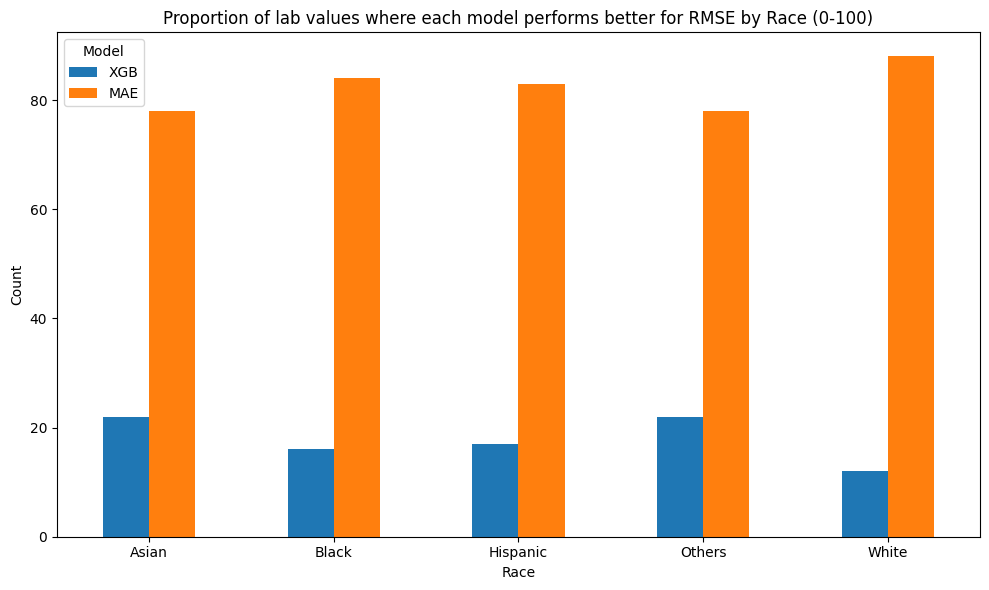

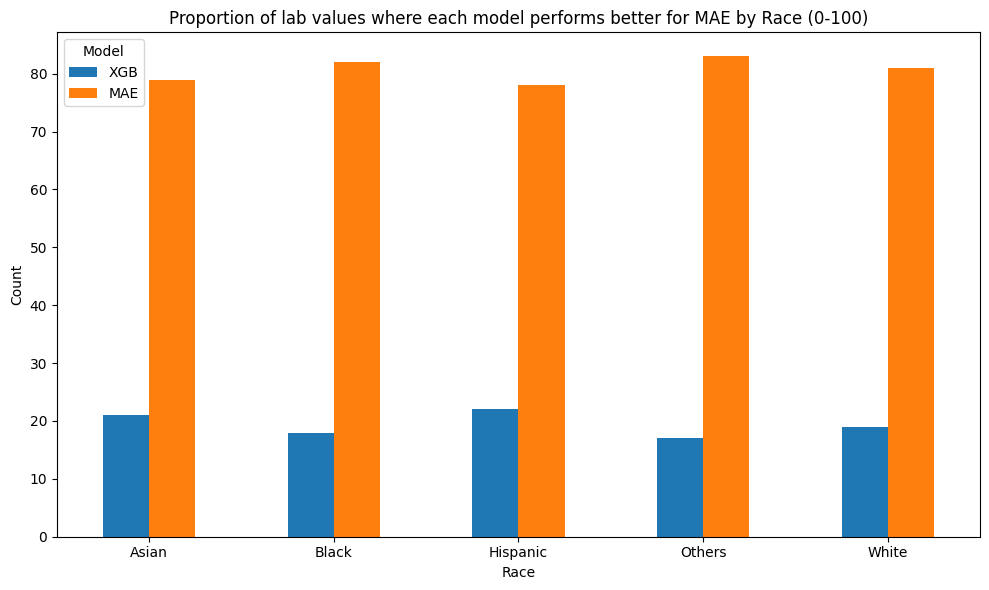

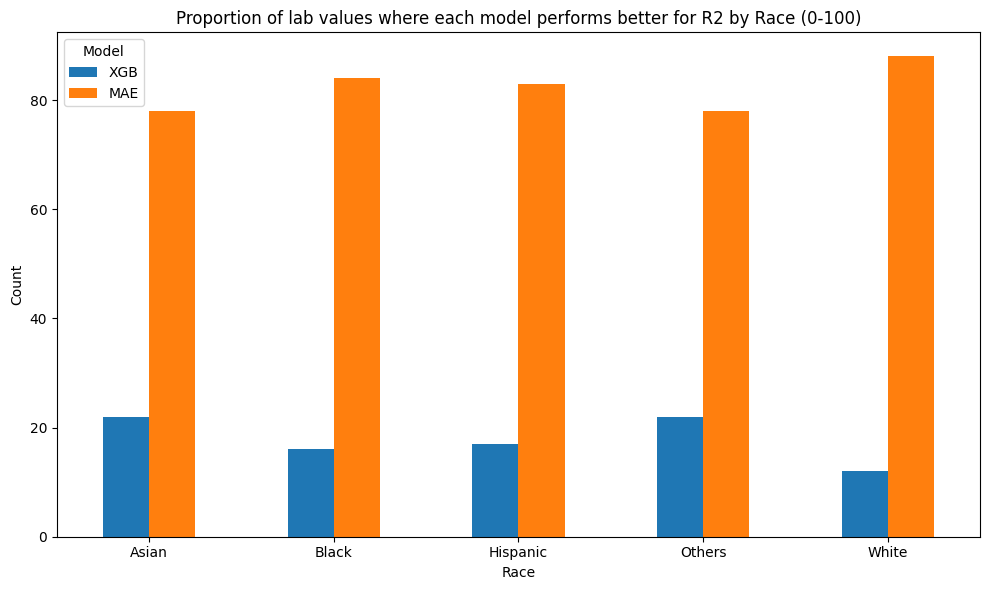

In [13]:
# Function to determine which model performs better per lab per metric
def best_model(row):
    best_per_lab = {}
    for metric in ['RMSE', 'MAE', 'R2']:
        xgb_col = f'{metric}_XGB'
        mae_col = f'{metric}_MAE'
        if metric == 'R2':
            best_per_lab[metric] = 'XGB' if row.get(xgb_col, float('-inf')) > row.get(mae_col, float('-inf')) else 'MAE'  # Higher R2 is better
        else:
            best_per_lab[metric] = 'XGB' if row.get(xgb_col, float('inf')) < row.get(mae_col, float('inf')) else 'MAE'  # Lower RMSE/MAE is better
    return best_per_lab

# Apply best model function
best_model_dict_race = df_pivot.apply(best_model, axis=1).to_dict()
best_model_dict_race

# Convert the dictionary to a DataFrame for easier analysis
data = []

for (lab, race), metrics in best_model_dict_race.items():
    for metric, model in metrics.items():
        data.append({'Race': race, 'Metric': metric, 'Model': model})

df = pd.DataFrame(data)


# Count the occurrences of MAE and XGB for each race and metric
model_counts = df.groupby(['Race', 'Metric', 'Model']).size().unstack(fill_value=0)

# Retrieve the default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot stacked bar chart with MAE as the first color
for metric in ['RMSE', 'MAE', 'R2']:
    model_counts_metric = model_counts.loc[:, metric, :]
    
    # Reindex to make MAE come first in the stack
    model_counts_metric = model_counts_metric[['XGB', 'MAE']]
    
    model_counts_metric.plot(kind='bar', figsize=(10, 6), color=default_colors[:2])
    
    plt.title(f'Proportion of lab values where each model performs better for {metric} by Race (0-100)')
    plt.ylabel('Count')
    plt.xlabel('Race')
    plt.xticks(rotation=0)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()

### Analysis of the Masked Autoencoder (MAE) model per race

In [14]:
# Filter for MAE model and group by race for comparison
df_mae = results_df_race[results_df_race['Model'] == 'MAE']

### Analysis of all the lab values

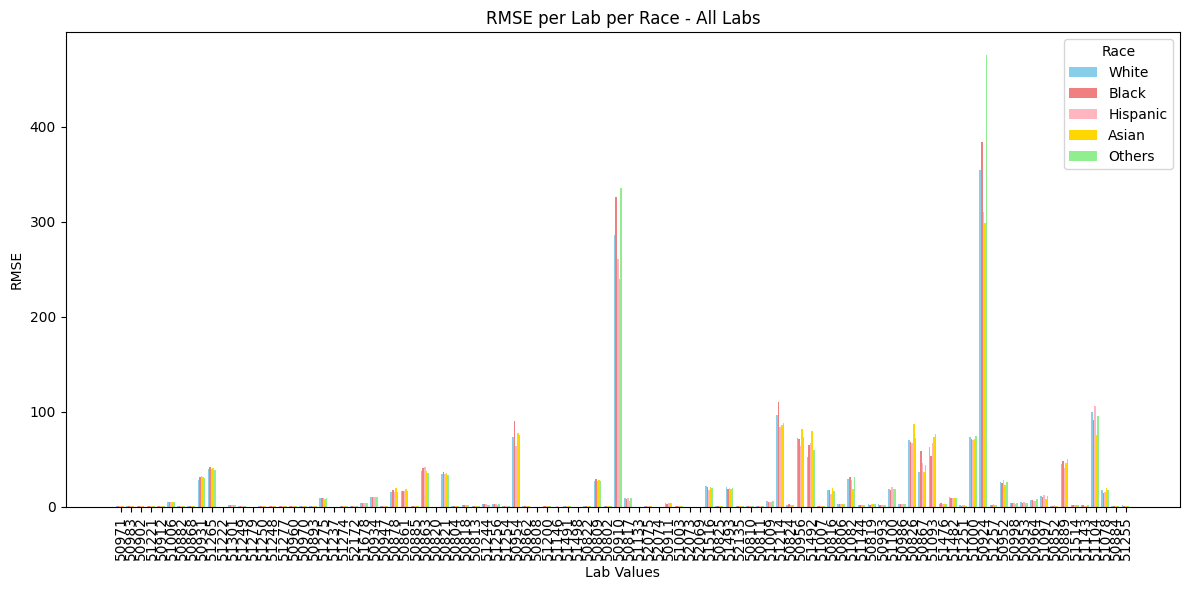

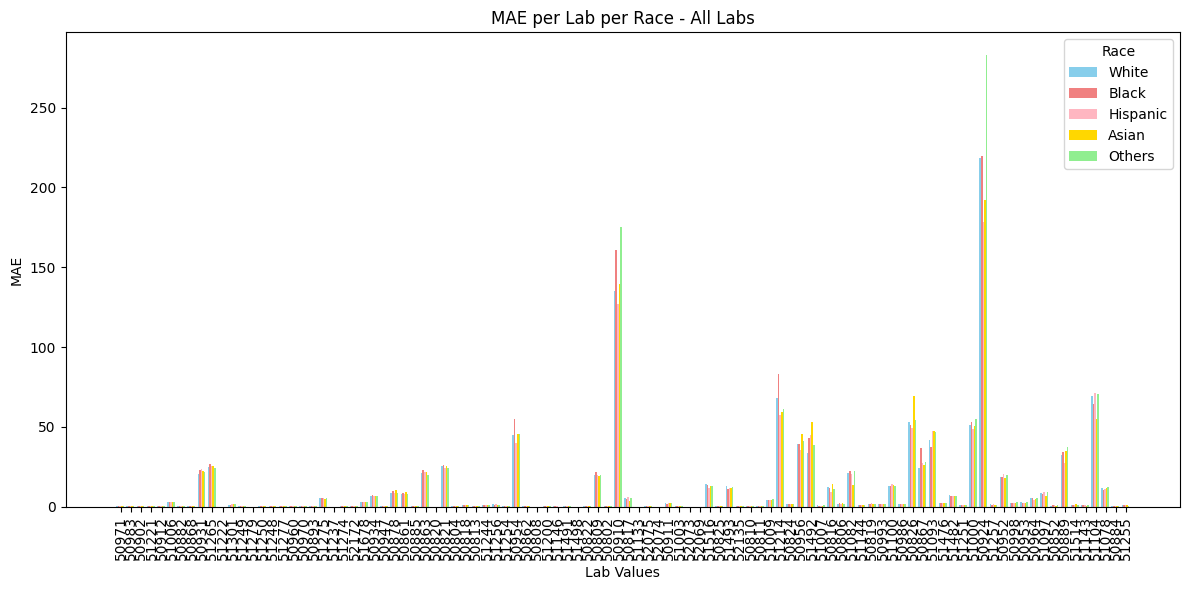

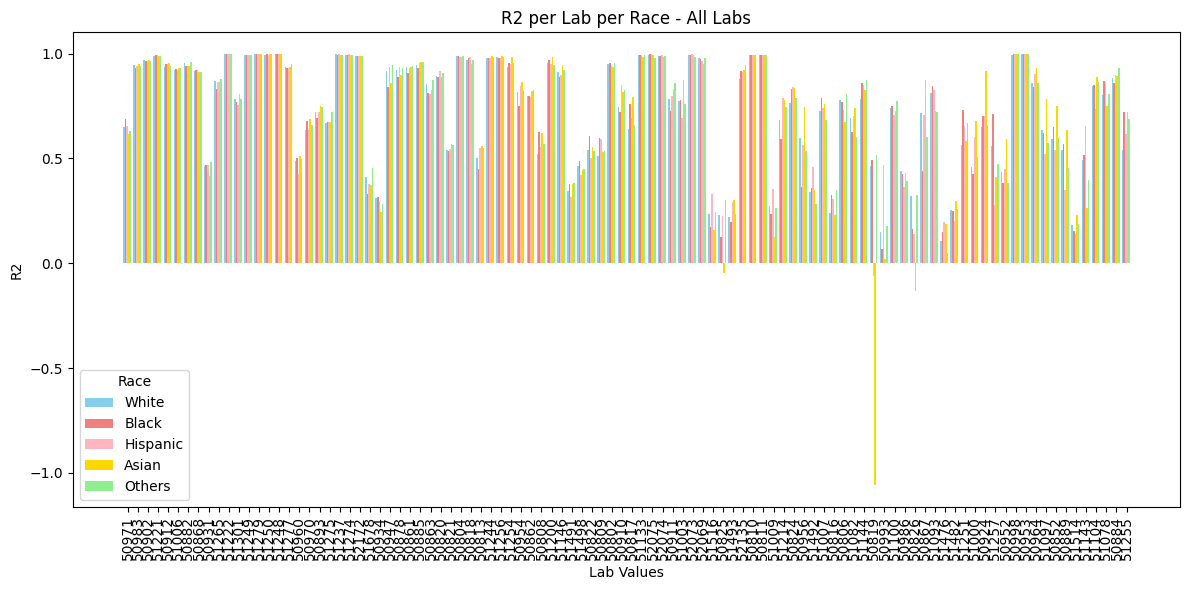

Race        Asian      Black   Hispanic     Others      White
Column                                                       
50802    0.724641   0.750110   0.739014   0.738827   0.716956
50804    0.657630   0.726396   0.703928   0.632401   0.639225
50806    2.611660   2.521103   2.255827   2.340353   2.395317
50808    0.053473   0.050774   0.053322   0.052137   0.051689
50809   27.779306  29.127909  27.101133  27.166495  27.367080
...           ...        ...        ...        ...        ...
52073    0.012219   0.013647   0.008814   0.021510   0.015664
52074    0.058474   0.045304   0.028001   0.042498   0.044222
52075    0.357092   0.278127   0.244789   0.651350   0.312576
52135    0.136178   0.136906   0.130316   0.132448   0.158416
52172    0.882184   0.883314   0.738626   0.899637   0.815180

[100 rows x 5 columns]
Race        Asian      Black   Hispanic     Others      White
Column                                                       
50802    0.481551   0.469498   0.484051   0.48

In [15]:
# Custom color palette for races
color_palette = {
    'White': 'skyblue',
    'Others': 'lightgreen',
    'Black': 'lightcoral',
    'Asian': 'gold',
    'Hispanic': 'lightpink'
}

def plot_grouped_metrics_with_spacing_and_colors(metric, df, title):
    plt.figure(figsize=(12, 6))
    unique_races = df['Race'].unique()
    lab_values = df['Column'].unique()
    bar_width = 0.2
    x = range(len(lab_values))

    spacing = 0.3  # Increase spacing between groups
    for i, race in enumerate(unique_races):
        x_race = [pos + i * bar_width + spacing * pos for pos in x]  # Add spacing between groups
        df_race = df[df['Race'] == race]
        color = color_palette.get(race, 'gray')  # Use color palette or default to gray
        plt.bar(x_race, df_race[metric], width=bar_width, label=race, color=color)

    plt.title(f"{metric} per Lab per Race - {title}")
    plt.xlabel("Lab Values")
    plt.ylabel(metric)
    plt.xticks([r + (len(unique_races) / 2) * bar_width + spacing * r for r in range(len(lab_values))], lab_values, rotation=90)
    plt.legend(title="Race")
    plt.tight_layout()
    plt.show()

# Function to display table per metric
def display_metric_table(metric, df):
    table_df = df.pivot(index='Column', columns='Race', values=metric)
    print(table_df)
    
# Grouped bar plot with spacing and custom colors for all lab values
plot_grouped_metrics_with_spacing_and_colors('RMSE', df_mae, "All Labs")
plot_grouped_metrics_with_spacing_and_colors('MAE', df_mae, "All Labs")
plot_grouped_metrics_with_spacing_and_colors('R2', df_mae, "All Labs")

# Displaying tables per metric for all lab values
display_metric_table('RMSE', df_mae)
display_metric_table('MAE', df_mae)
display_metric_table('R2', df_mae)

### Analysis of the top 20 lab values

In [16]:
# Sorting by popularity for top 20 labs
df_top20 = df_mae.nlargest(20*5, 'Popularity')
df_top20

,Column,RMSE,MAE,R2,Err,Model,Race,Popularity
4,50912,0.223452,0.128542,0.935377,0,MAE,White,90094
104,50912,0.261628,0.143172,0.952492,0,MAE,Black,90094
204,50912,0.229736,0.131821,0.952221,0,MAE,Hispanic,90094
304,50912,0.245948,0.132962,0.956528,0,MAE,Asian,90094
404,50912,0.234855,0.134540,0.938382,0,MAE,Others,90094
...,...,...,...,...,...,...,...,...
18,50970,0.507252,0.389758,0.636567,0,MAE,White,77055
118,50970,0.518084,0.393452,0.677309,0,MAE,Black,77055
218,50970,0.531088,0.402943,0.633577,0,MAE,Hispanic,77055
318,50970,0.505884,0.384140,0.689213,0,MAE,Asian,77055


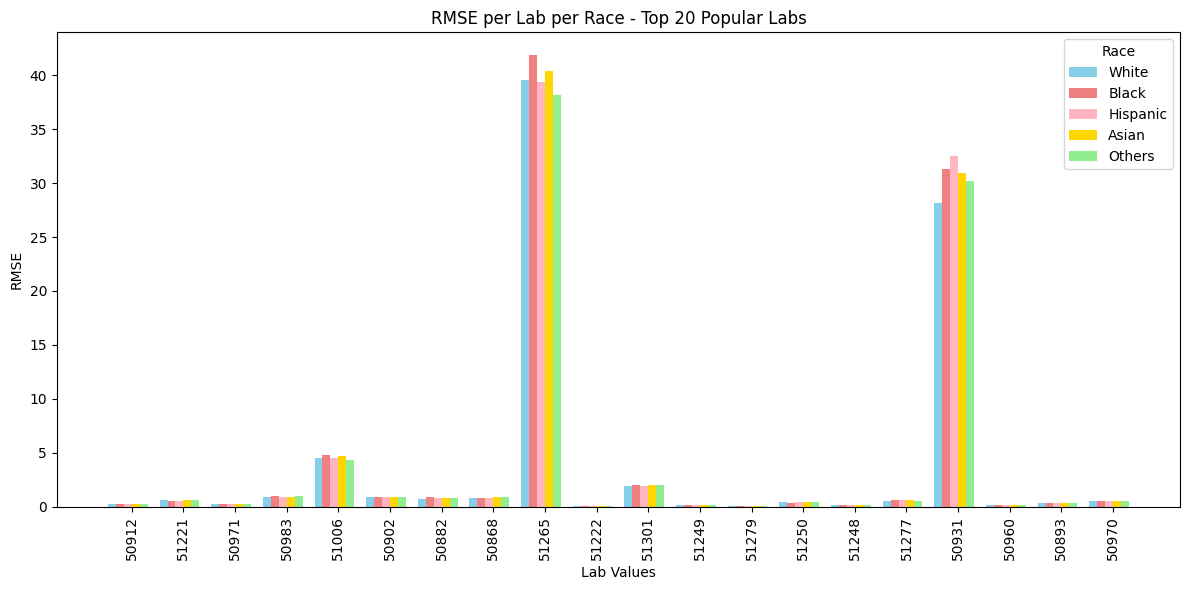

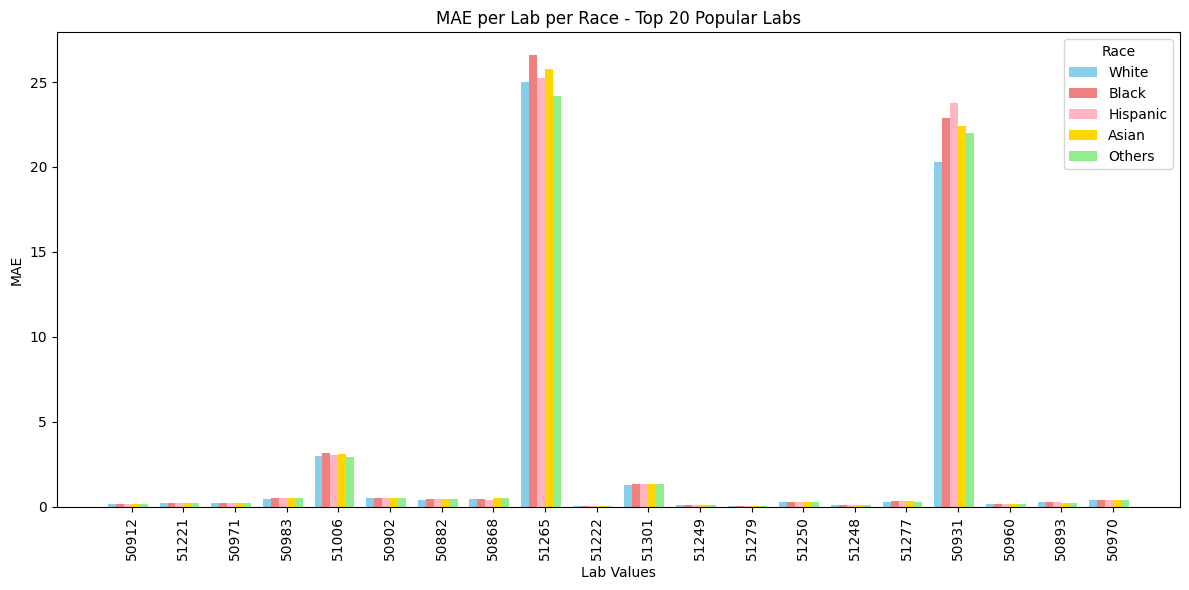

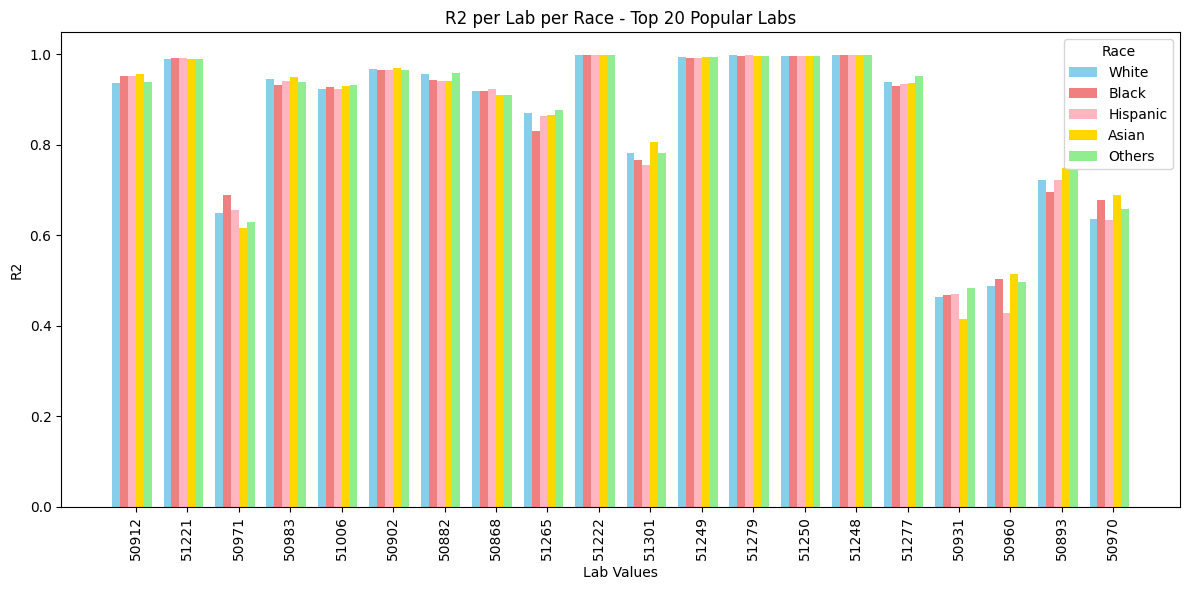

Race        Asian      Black   Hispanic     Others      White
Column                                                       
50868    0.863965   0.834027   0.768450   0.859935   0.792837
50882    0.814009   0.866536   0.814290   0.759970   0.736664
50893    0.317565   0.343641   0.325656   0.319174   0.320177
50902    0.874638   0.923711   0.903508   0.916802   0.853832
50912    0.245948   0.261628   0.229736   0.234855   0.223452
50931   30.986944  31.335728  32.548511  30.157300  28.196085
50960    0.177743   0.178325   0.182174   0.176377   0.177767
50970    0.505884   0.518084   0.531088   0.510175   0.507252
50971    0.279046   0.272223   0.274331   0.277883   0.267974
50983    0.888463   0.945861   0.891104   0.937552   0.855640
51006    4.701070   4.809937   4.554165   4.330988   4.480740
51221    0.603492   0.526436   0.527607   0.575224   0.571612
51222    0.080033   0.085128   0.074742   0.082114   0.077877
51248    0.104865   0.110793   0.113235   0.108812   0.107794
51249   

Race,Asian,Black,Hispanic,Others,White
Column,,,,,
50868,0.910455,0.919743,0.922255,0.910979,0.918122
50882,0.941860,0.943108,0.941197,0.957739,0.956181
50893,0.747930,0.695001,0.721078,0.743900,0.721091
50902,0.970214,0.965344,0.964723,0.965095,0.967105
50912,0.956528,0.952492,0.952221,0.938382,0.935377
50931,0.414301,0.466891,0.469992,0.482339,0.463708
50960,0.513402,0.502829,0.427770,0.496479,0.488772
50970,0.689213,0.677309,0.633577,0.658054,0.636567
50971,0.615099,0.689069,0.656622,0.628966,0.648681


In [17]:
# Grouped bar plot with spacing and custom colors for top 20 popular labs
plot_grouped_metrics_with_spacing_and_colors('RMSE', df_top20, "Top 20 Popular Labs")
plot_grouped_metrics_with_spacing_and_colors('MAE', df_top20, "Top 20 Popular Labs")
plot_grouped_metrics_with_spacing_and_colors('R2', df_top20, "Top 20 Popular Labs")

# Displaying tables per metric for top 20 popular labs
display_metric_table('RMSE', df_top20)
display_metric_table('MAE', df_top20)
display_metric_table('R2', df_top20)

df_top20.pivot(index='Column', columns='Race', values='R2')

In [18]:
# Group by race and calculate the mean of each metric
race_comparison = df_pivot.groupby('Race').agg({
    'MAE_MAE': 'mean',
    'R2_MAE': 'mean',
    'RMSE_MAE': 'mean'
}).reset_index()

race_comparison

,Race,MAE_MAE,R2_MAE,RMSE_MAE
0,Asian,11.292834,0.716537,17.200421
1,Black,12.023545,0.719399,19.238630
2,Hispanic,10.712513,0.721731,17.252905
3,Others,12.555353,0.726863,19.948098
4,White,11.305508,0.720649,18.035893


## Follow-up Analysis:

In some cases there's already a follow-up that can be used for the model to predict the target lab value. To understand the performance of the model with follow-up and without follow-up, we will analyze the number of lab values with follow-up and without follow-up in the test set and the performance of the model in each case.

In [19]:
# Get the list of 'npval' and 'npval_last' columns
npval_columns = [col for col in df_test.columns if col.startswith('npval_') and not col.startswith('npval_last_')]
npval_last_columns = [col for col in df_test.columns if col.startswith('npval_last_')]

##### Get the follow up values per lab test

We'll use the columns npval_{lab_id} with npval_last_{lab_id} to get the follow-up values for each lab test, if the column npval_last_{lab_id} is not null, then we have a follow-up value for the lab test.

In [21]:
# Counting how many times a patient has a follow-up for each lab value
follow_up_counts = {}

for npval_col in npval_columns:
    # Get corresponding npval_last column
    npval_id = npval_col.split('_')[1]
    npval_last_col = f'npval_last_{npval_id}'
    
    if npval_last_col in df_test.columns:
        # Count non-null values where both npval and npval_last are present
        count = df_test[[npval_col, npval_last_col]].dropna().shape[0]
        follow_up_counts[npval_id] = count


In [22]:
# Counting total npval values for each lab (non-null values)
total_counts = {}

for npval_col in npval_columns:
    # Count non-null values for each npval
    count = df_test[npval_col].notna().sum()
    npval_id = npval_col.split('_')[1]
    total_counts[npval_id] = count

# Merging follow-up counts with total counts to understand the proportion
comparison_df = pd.DataFrame({
    'Lab ID': follow_up_counts.keys(),
    'Total npval Count': total_counts.values(),
    'Follow-up Count': follow_up_counts.values()
})

# Calculating the proportion of follow-up counts
comparison_df['Follow-up Proportion'] = comparison_df['Follow-up Count'] / comparison_df['Total npval Count']


In [23]:
comparison_df

,Lab ID,Total npval Count,Follow-up Count,Follow-up Proportion
0,50971,90080,71008,0.788277
1,50983,89609,70609,0.787968
2,50902,89533,70554,0.788022
3,51221,90090,70205,0.779276
4,50912,90094,70870,0.786623
...,...,...,...,...
95,51143,1349,725,0.537435
96,51104,1555,303,0.194855
97,51078,1501,336,0.223851
98,50884,1345,618,0.459480
